In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read the dataset
df=pd.read_csv('SampleSuperStore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# check the data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

* The given dataset is perfect.

In [4]:
# finding null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

* There is no null values in the given dataset

# 5 point summary for numerical variable

In [5]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


# Category columns

In [6]:
df.describe(include='object').T

,count,unique,top,freq
Ship Mode,9994,4,Standard Class,5968
Segment,9994,3,Consumer,5191
Country,9994,1,United States,9994
City,9994,531,New York City,915
State,9994,49,California,2001
Region,9994,4,West,3203
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523


categorical: 
* Total 9994 categories present in the variable
* United States top category with highest freq is 9994.
* freq of the top category is 9994.


In [7]:
col = ["Postal Code"]
df1= df.drop(columns=col,axis=1)

In [8]:
df1.corr()

ValueError: could not convert string to float: 'Second Class'

# Univariate Analysis for Numeric

In [ ]:
for i in df.select_dtypes(include='number'):
    sns.boxplot(x=df[i])
    plt.show()

In [ ]:
df[['Sales']].plot(kind='kde')
print("skewness:",df[['Sales']].skew()[0])
print("Kurtosis:",df[['Sales']].kurt())
plt.show()

* It is a right skewed.
* It is lepto kurtic.

In [ ]:
df[['Quantity']].plot(kind='kde')
print("skewness:",df[['Quantity']].skew()[0])
print("Kurtosis:",df[['Quantity']].kurt())
plt.show()

* It is a right skewed.
* It is a platy kurtic.

In [ ]:
df[['Discount']].plot(kind='kde')
print("skewness:",df[['Discount']].skew()[0])
print("Kurtosis:",df[['Discount']].kurt())
plt.show()

* It is a right skewed.
* It is a platy kurtic.

In [ ]:
df[['Profit']].plot(kind='kde')
plt.axvline(df['Profit'].mean())
print("skewness:",df[['Profit']].skew()[0])
print("Kurtosis:",df[['Profit']].kurt())
plt.show()

* It is a right skewed.
* It is a lepto kurtic.

# Univariate Analysis for Categoric


In [ ]:
df.describe(include='object').T

In [ ]:
df.select_dtypes(include='object').columns

In [ ]:
df['Ship Mode'].value_counts()

In [ ]:
sns.countplot(x=df['Ship Mode'])
plt.show()

* In the ship mode Standard class has the highest frequency

In [ ]:
df['Segment'].value_counts()

In [ ]:
sns.countplot(x=df['Segment'])
plt.show()

* In the above segment variable consumer has the highest frequency.

In [ ]:
df['Country'].value_counts()

In [ ]:
sns.countplot(x=df['Country'])
plt.show()

* In the above country variable we have only one column.

# Bivariate Analysis

In [ ]:
df.head()

In [ ]:
df.groupby('State')['Sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Profit in Region wise

In [ ]:
df.groupby('Region')['Profit'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

* The average of profit is high in west region.
* The average of profit is less in central region

## Country and regoin wise slaes

In [ ]:
df.groupby('Region')['Country'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

In [ ]:
 df.groupby(['Category','Region'])['Sales'].value_counts().sort_values(ascending=False)

In [ ]:
 df.groupby(['Category','Region'])['Sales'].value_counts().sort_values(ascending=False).plot(kind='kde')
plt.show()

* Sales are high in west region .

## Category wise Sales

In [ ]:
category_sales = df.groupby('Category')['Sales'].sum()
category_sales

In [ ]:
# Visualization of category-wise sales
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar')
plt.title('Category-wise Sales Analysis')
plt.xlabel('Categories')
plt.ylabel('Sales')
plt.show()


* Technology if high in sales and office supples are less

## Inventory Analysis

In [ ]:
inventory_analysis = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print(inventory_analysis)

In [ ]:
plt.figure(figsize=(10, 5))
inventory_analysis.plot(kind='bar')
plt.title('Category-wise quantity Analysis')
plt.xlabel('Categories')
plt.ylabel('Quantity')
plt.show()


* The office supplies are high quantity because the sales of office supplies are less.
*  Technology are less quantity because the sales of technology  is high.

In [ ]:
marketing_analysis = df.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False)
print(marketing_analysis)


In [ ]:
plt.figure(figsize=(10, 5))
marketing_analysis.plot(kind='bar')
plt.title('Sub-Category-wise sales Analysis')
plt.xlabel('Sub-Categories')
plt.ylabel('Sales')
plt.show()


* In Technology phones are high in sales

In [ ]:
customer_segmentation = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(customer_segmentation)

In [ ]:
plt.figure(figsize=(10, 5))
customer_segmentation .plot(kind='bar')
plt.title('Segment sales Analysis')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

In [9]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.groupby('Category')['Profit'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

* Profit is also high in technology because sales are high.
* profit is less in furniture .

In [ ]:
df.groupby('Category')['Discount'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

* Discount is high in furniture Category.

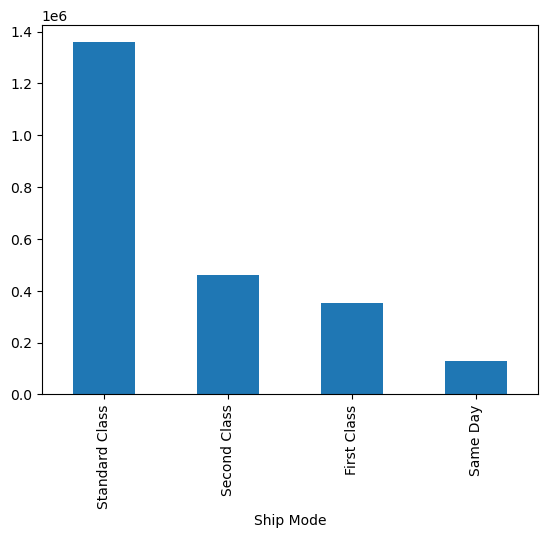

In [17]:
df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

## Conclusion

* The average of profit is high in west region.
* The average of profit is less in central region
* Sales are high in west region
* Technology if high in sales and office supples are less
* The office supplies are high quantity because the sales of office supplies are less.
* Technology are less quantity because the sales of technology is high.
* In Technology phones are high in sales
* Profit is also high in technology because sales are high.
* profit is less in furniture
* Discount is high in furniture Category.